## Downloading and Unzipping the data - It will take a lot of time. It has to download and unzip registered image data of 15 Atlases

In [1]:
cd /content

/content


In [0]:
!wget -O avg.rar https://www.dropbox.com/s/csqj9r4dwul0nvg/avg_atlas_transform.rar?dl=0
!wget -O final.rar https://www.dropbox.com/s/kv6yvak490nd2em/final.rar?dl=0
!wget -O multi.rar https://www.dropbox.com/s/jtft015l142348f/multi.rar?dl=0

--2019-12-05 19:46:39--  https://www.dropbox.com/s/csqj9r4dwul0nvg/avg_atlas_transform.rar?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/csqj9r4dwul0nvg/avg_atlas_transform.rar [following]
--2019-12-05 19:46:40--  https://www.dropbox.com/s/raw/csqj9r4dwul0nvg/avg_atlas_transform.rar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc60cc88331caf5699ecbf7cb224.dl.dropboxusercontent.com/cd/0/inline/Atqt0MHAUhmDXZcSp-ZxME_8Ozf6DYViDS9IsimiddcnU8qSBqmZCVe7of22HAKaXXSeSgKDVsn3uPNR6EbFhUkxgriBSmTwbJt4-rHb9QPzWYWP2xhD_5sFW531k67VaeY/file# [following]
--2019-12-05 19:46:40--  https://uc60cc88331caf5699ecbf7cb224.dl.dropboxusercontent.com/cd/0/inline/Atqt0MHAUhmDXZcSp-ZxME_8Ozf6DYViDS9IsimiddcnU8qSBqmZCVe7of22HAKaXXSeSgKDV

In [0]:
!unrar x avg.rar
!unrar x multi.rar
!unrar x final.rar

## Changing present working directory to the directory containing Training Files and Labels

In [0]:
cd multi

/content/drive/My Drive/misa_lab3/nmulti


## Loading the Images

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Thu Nov 14 17:23:55 2019


@authors: Zohaib & Isaac (MAIA_3, 3rd Semester, Girona)
"""

import os
import time
import cv2 as cv
import numpy as np
import nibabel as nib
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from scipy.stats import moment
from scipy.stats import multivariate_normal
from sklearn.datasets import make_spd_matrix
from glob import glob

def getImgs(folder,num = 1):
    '''
    This function explores the folders inside './results' path, where different cases exist.
    '''
    root_folder = os.getcwd()
    data_folder = os.path.join(root_folder, folder)
    folders = glob(data_folder + "/*")
    img = [img for folder in folders for img in load_images_from_folder(folder)]
    return img,_,_

def load_images_from_folder(folder):
    images = []
    test=os.listdir(folder)
    test.sort()
    #print(test)
    for filename in test:
        if (filename.endswith(".nii") or filename.endswith(".nii.gz")):
            img = nib.load(os.path.join(folder, filename))
            img = img.get_fdata()

            if img is not None:
                if filename.endswith("g.nii"):
                    continue
                else:
                    images.append(img)
    return images

def get_header(filename):

    print(filename)
    if (filename.endswith(".nii") or filename.endswith(".nii.gz")):
        img = nib.load(filename)
        head = img.header
        aff = img.affine
    return head,aff

img,header,affine = getImgs('../registered_images') #change this to ../registered_images
gt_img,_,_ = getImgs('../registered_labels') #change this to ../registerd_labels



## Creating the Mean Image for 15 atlases separately

In [0]:
atlas_name = os.listdir('./')
atlas_name.sort()

for j in range(0,15):
  i = atlas_name[j]
  print(i)
  rg_images = i + "/registered_images"
  rg_labels = i +  "/registered_labels"
  print(rg_images)
  img,_,_ = getImgs(rg_images,j)
  path_n = "../training/training-images/" + i + ".nii.gz"
  print(path_n)
  header, affine = get_header(path_n)
  gt_img, _ , _ = getImgs(rg_labels)
  mean_image = np.zeros(img[0].shape)

  result_dir = "./results/" + i
  !mkdir $result_dir

  for i in range(0,len(img)):
    mean_image += (img[i] - np.min(img[i]))/(np.max(img[i])- np.min(img[i]))

  mean_image = mean_image/len(img)
  CSF = np.zeros(img[0].shape) # label 1
  GM = np.zeros(img[0].shape)  # label 2
  WM =  np.zeros(img[0].shape) # label 3


  for i in range(0,len(img)):
    CSF += (gt_img[i] == 1) *1
    GM += (gt_img[i] == 2) *1
    WM += (gt_img[i] == 3) *1

  total = CSF + GM + WM
  zero_indices = (total == 0)
  total[zero_indices] = 1

  CSF = np.divide(CSF,total)

  GM = np.divide(GM,total)

  WM = np.divide(WM,total)

  ni_mean_image = nib.Nifti1Image(mean_image, affine, header)
  ni_CSF = nib.Nifti1Image(CSF, affine, header)
  ni_GM = nib.Nifti1Image(GM, affine, header)
  ni_WM = nib.Nifti1Image(WM, affine, header)

  nib.save(ni_mean_image, result_dir + '/mean_image.nii')
  nib.save(ni_CSF, result_dir + '/CSF.nii')
  nib.save(ni_GM, result_dir + '/GM.nii')
  nib.save(ni_WM, result_dir + '/WM.nii')



1000
1000/registered_images
../final/training/training-images/1000.nii.gz
../final/training/training-images/1000.nii.gz
mkdir: cannot create directory ‘./results/1000’: File exists
1001
1001/registered_images
../final/training/training-images/1001.nii.gz
../final/training/training-images/1001.nii.gz
mkdir: cannot create directory ‘./results/1001’: File exists
1002
1002/registered_images
../final/training/training-images/1002.nii.gz
../final/training/training-images/1002.nii.gz
mkdir: cannot create directory ‘./results/1002’: File exists
1006
1006/registered_images
../final/training/training-images/1006.nii.gz
../final/training/training-images/1006.nii.gz
mkdir: cannot create directory ‘./results/1006’: File exists
1007
1007/registered_images
../final/training/training-images/1007.nii.gz
../final/training/training-images/1007.nii.gz
mkdir: cannot create directory ‘./results/1007’: File exists
1008
1008/registered_images
../final/training/training-images/1008.nii.gz
../final/training/tra

## Change the directory to avg_atlas_transform

In [0]:
cd avg_atlas_transform

/content/drive/My Drive/misa_lab3/avg_atlas_transform


##Generating the Average Atlas

In [0]:
import os
import nibabel as nib
import numpy as np

test=os.listdir("./")
test.sort()

count =0
for i in test:
  print(test)
  csf = os.path.join(".", i,"csf", "result.nii")
  img = nib.load(csf)
  img = img.get_fdata()

  if count ==0 :
    csf_avg = np.zeros(img.shape)
  else:
    csf_avg += img
  count = count+1
csf_avg = csf_avg / len(test)

count =0
for i in test:
  wm = os.path.join(".", i,"wm", "result.nii")
  img = nib.load(wm)
  img = img.get_fdata()

  if count ==0 :
    wm_avg = np.zeros(img.shape)
  else:
    wm_avg += img
  count = count+1

wm_avg = wm_avg / len(test)


count =0
for i in test:
  gm = os.path.join(".", i,"gm", "result.nii")
  img = nib.load(gm)
  img = img.get_fdata()

  if count ==0 :
    gm_avg = np.zeros(img.shape)
  else:
    gm_avg += img
  count = count+1

gm_avg = gm_avg / len(test)




['1000', '1001', '1002', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '1013', '1014', '1015', '1017', '1036']
['1000', '1001', '1002', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '1013', '1014', '1015', '1017', '1036']
['1000', '1001', '1002', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '1013', '1014', '1015', '1017', '1036']
['1000', '1001', '1002', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '1013', '1014', '1015', '1017', '1036']
['1000', '1001', '1002', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '1013', '1014', '1015', '1017', '1036']
['1000', '1001', '1002', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '1013', '1014', '1015', '1017', '1036']
['1000', '1001', '1002', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '1013', '1014', '1015', '1017', '1036']
['1000', '1001', '1002', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '1013', '1014', '1015', '1017', '1036']
['1000', '1001', '1002', '1006',

## Displaying the Average Atlas

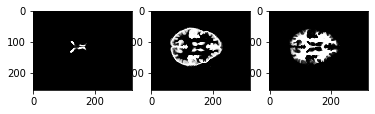

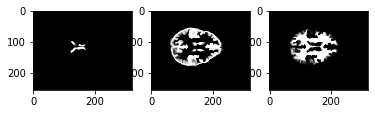

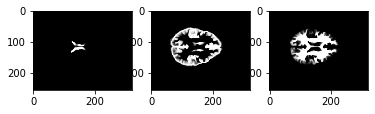

In [0]:
for i in range(150,153):
  plt.figure()
  plt.subplot(1,3,1)
  plt.imshow(csf_avg[:,:,i],cmap='gray')

  plt.subplot(1,3,2)
  plt.imshow(wm_avg[:,:,i],cmap='gray')

  plt.subplot(1,3,3)
  plt.imshow(gm_avg[:,:,i],cmap='gray')
  plt.show()


## Saving the average Atlas

In [0]:
def get_header(filename):

    print(filename)
    if (filename.endswith(".nii") or filename.endswith(".nii.gz")):
        img = nib.load(filename)
        head = img.header
        aff = img.affine
    return head,aff

path = "../training/training-images/" + "1007" + ".nii.gz"
print(path)
header, affine = get_header(path)

ni_CSF = nib.Nifti1Image(csf_avg, affine, header)
ni_GM = nib.Nifti1Image(gm_avg, affine, header)
ni_WM = nib.Nifti1Image(wm_avg, affine, header)

nib.save(ni_CSF, 'CSF.nii')
nib.save(ni_GM, 'GM.nii')
nib.save(ni_WM, 'WM.nii')

../final/training/training-images/1007.nii.gz
../final/training/training-images/1007.nii.gz
